<a href="https://colab.research.google.com/github/MinSeok1o28/MS_K/blob/main/Parking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##광진구 데이터공모전

In [ ]:
#google drive 연결
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#패키지
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
import seaborn as sns
%matplotlib inline
!sudo apt-get install -y fonts-nanum
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.


##데이터 전처리

In [ ]:
#2022 ~ 2023년도 단속현황
df1 = pd.read_csv('/content/drive/MyDrive/GwangJin/Parking/서울특별시 광진구_주정차단속현황_20230228.csv', encoding = 'cp949')
df1['단속일시'] = pd.to_datetime(df1['단속일시'], format = '%Y-%m-%d %H:%M:%S')
df_2023 = df1[['단속일시', '단속동', '단속장소']]
df_2023.head()

,단속일시,단속동,단속장소
0,2022-01-01 02:29:00,중곡동,서울특별시 광진구 영화사로5길 19
1,2022-01-01 06:41:00,중곡동,150-196
2,2022-01-01 07:02:00,구의동,서울 광진구 구의동 660-1 주차장앞
3,2022-01-01 07:29:00,구의동,서울 광진구 구의동 6-4
4,2022-01-01 10:55:00,구의동,리젠트오피스텔건너편


In [ ]:
#2015 ~ 2022년도 단속현황
df2 = pd.read_csv('/content/drive/MyDrive/GwangJin/Parking/서울특별시 광진구_주정차 단속현황_20220610.csv', encoding = 'cp949')
df2['단속일시'] = pd.to_datetime(df2['단속일시'], format = '%Y-%m-%d %H:%M:%S')
df_2015_2022 = df2[['단속일시', '단속동', '단속장소']]
df_2015_2022.head()

,단속일시,단속동,단속장소
0,2015-01-01 06:44:00,화양동,119-4
1,2015-01-01 07:01:00,화양동,건대입구1번출구앞
2,2015-01-01 07:24:00,구의동,동서울터미널 주차장앞
3,2015-01-01 08:00:00,화양동,건대입구1번출구앞
4,2015-01-01 08:15:00,화양동,건대입구1번출구앞


In [ ]:
#데이터 병합
concated_df = pd.concat([df1, df2]).drop_duplicates()
concated_df['단속일시'] = pd.to_datetime(concated_df['단속일시'], format = '%Y-%m-%d %H:%M:%S')
concated_df = concated_df[['단속일시', '단속동', '단속장소']]
concated_df.head()

,단속일시,단속동,단속장소
0,2022-01-01 02:29:00,중곡동,서울특별시 광진구 영화사로5길 19
1,2022-01-01 06:41:00,중곡동,150-196
2,2022-01-01 07:02:00,구의동,서울 광진구 구의동 660-1 주차장앞
3,2022-01-01 07:29:00,구의동,서울 광진구 구의동 6-4
4,2022-01-01 10:55:00,구의동,리젠트오피스텔건너편


In [ ]:
concated_df['month'] = concated_df['단속일시'].dt.month
concated_df.head()

,단속일시,단속동,단속장소,month
0,2022-01-01 02:29:00,중곡동,서울특별시 광진구 영화사로5길 19,1
1,2022-01-01 06:41:00,중곡동,150-196,1
2,2022-01-01 07:02:00,구의동,서울 광진구 구의동 660-1 주차장앞,1
3,2022-01-01 07:29:00,구의동,서울 광진구 구의동 6-4,1
4,2022-01-01 10:55:00,구의동,리젠트오피스텔건너편,1


In [ ]:
#년도별 데이터 분석
by_year = concated_df.groupby(concated_df.단속일시.dt.year)['단속동'].count()
by_year = pd.DataFrame(by_year)
by_year = by_year.rename(columns = {'단속동' : '년도별 단속 횟수'})
by_year.tail(3)

,년도별 단속 횟수
단속일시,
2021,56761
2022,55811
2023,4005


In [ ]:
#월별 데이터 분석
monthly = concated_df.groupby(concated_df.단속일시.dt.month)['단속동'].count()
monthly = pd.DataFrame(monthly)
monthly = monthly.rename(columns = {'단속동' : '월별 단속 횟수'})
monthly.head(3)

,월별 단속 횟수
단속일시,
1,44791
2,39491
3,46124


In [ ]:
#시간별 빈도
by_hour = concated_df.groupby(concated_df.단속일시.dt.hour)['단속동'].count()
by_hour = pd.DataFrame(by_hour)
by_hour = by_hour.rename(columns = {'단속동' : '시간별 단속 횟수'})
by_hour.head(3)

,시간별 단속 횟수
단속일시,
0,10554
1,5494
2,3619


In [ ]:
#불법주정차 위반 단속 CCTV 위치
cctv = pd.read_csv('/content/drive/MyDrive/GwangJin/Parking/서울시 광진구 불법주정차 위반 단속 CCTV 위치정보.csv', encoding = 'cp949')
cctv.head()

,고정형CCTV지번주소,위도,경도,자치구,단속지점명,현장구분
0,서울 광진구 광장동 334-2,37.547790,127.106990,광진구,SK강평주유소 앞,불법주정차구역
1,서울 광진구 광장동 445-3,37.543799,127.102410,광진구,광현교회 앞,불법주정차구역
2,서울 광진구 구의동 135,37.549593,127.081780,광진구,아차산역 5번출구 앞,불법주정차구역
3,서울 광진구 군자동 503,37.548609,127.071072,광진구,두산위브 앞,불법주정차구역
4,서울 광진구 구의동 66-62,37.545348,127.088420,광진구,국민은행 앞,불법주정차구역


In [ ]:
#동별 CCTV 개수
cctv_dong = cctv.groupby(cctv['고정형CCTV지번주소'].str.split(' ').str[2])[['위도']].count()
cctv_dong = cctv_dong.rename(columns = {'위도' : 'cctv개수'})
cctv_dong

,cctv개수
고정형CCTV지번주소,
광장동,4
구의동,16
군자동,6
능동,3
자양동,13
중곡동,12
화양동,4


In [ ]:
#동별 주정차단속 현황


In [ ]:
cctv_lat = cctv['위도']
cctv_long = cctv['경도']

#결측치 확인

In [ ]:
concated_df.isna().sum()

단속년도    0
단속월     0
단속동     0
단속장소    6
dtype: int64

In [ ]:
cctv.isna().sum()

고정형CCTV지번주소    0
위도             0
경도             0
자치구            0
단속지점명          0
현장구분           0
dtype: int64

#시각화: 불법주정차 단속 현황

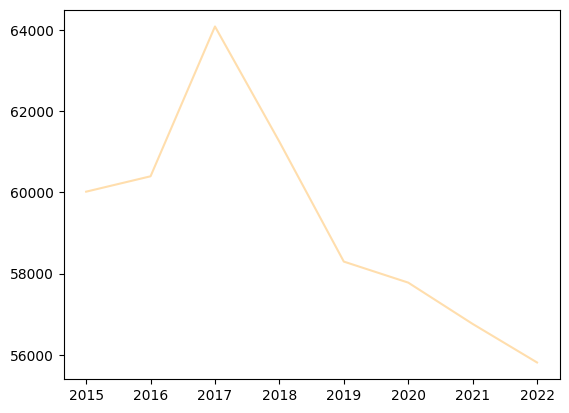

In [ ]:
#년도별 단속 횟수(2023년 데이터는 3월까지밖에 없으므로 제외함.)
plt.plot(by_year[by_year.index < 2023].index , by_year[by_year.index < 2023]['년도별 단속 횟수'], color = 'navajowhite')
plt.xlabel('단속년도', fontproperties=font)
plt.ylabel('년도별 단속 횟수', fontproperties=font)
plt.title('2015 ~ 2023년 년도별 단속 횟수', fontproperties=font)
plt.show()

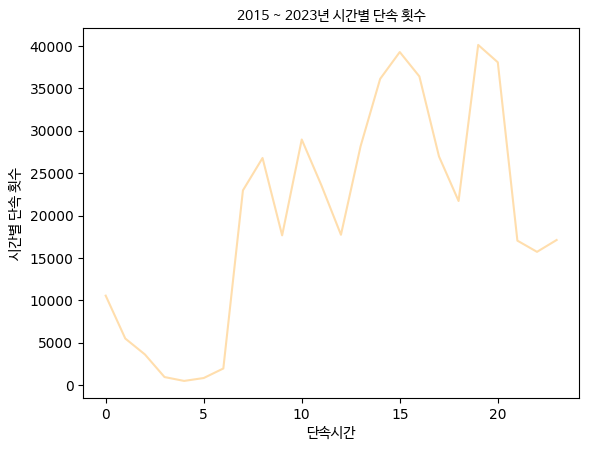

In [ ]:
#시간별 단속 횟수
plt.plot(by_hour.index, by_hour['시간별 단속 횟수'], color = 'navajowhite')
plt.xlabel('단속시간', fontproperties=font)
plt.ylabel('시간별 단속 횟수', fontproperties=font)
plt.title('2015 ~ 2023년 시간별 단속 횟수', fontproperties=font)
plt.show()

In [ ]:
#동별 단속 현황
concated_df = 

#시각화: 불법주정차 CCTV 위치

In [ ]:
m = folium.Map(location=[37.5385607, 127.0822739], 
               zoom_start=14, 
               )
# 건대입구역
folium.Marker([37.54041716624373, 127.06914637466906],
              popup='<b>subway</b>',
              tooltip='<i>건대입구역</i>').add_to(m) 
#광진구청
folium.Marker([37.5385607, 127.0822739],
              tooltip='<i>광진구청</i>').add_to(m)
m